# Exercise 9: Integration Schemes

## 9.1 Exercise: Harmonic Oscillators
Euler integrator:
$$
p(t + \Delta t) = p(t) - x(t) \Delta t \\
x(t +\Delta t) = x(t) + p(t) \Delta t
$$

second integrator:

$$
p(t + \Delta t) = p(t) - x(t) \Delta t \\
x(t +\Delta t) = x(t) + p(t + \Delta t) \Delta t
$$

#### a) Expressing the integrators in Matrix form:

$$
\begin{pmatrix}
x \\ p
\end{pmatrix}_{t+\Delta t} 
= M \times \begin{pmatrix}
x \\ p
\end{pmatrix}_{t} \tag{1}
$$

For the Euler integrator:
$$ M_{1} = \begin{bmatrix}
1 & \Delta t \\
-\Delta t & 1 \\
\end{bmatrix}
$$
and for the determinant of $M_1$:
$$ det[M_1] =
\begin{vmatrix}
1 & \Delta t \\
-\Delta t & 1 \\
\end{vmatrix} = 1 + (\Delta t)² \geqq 1
$$

This is a clear sign it is not a symplectic Matrix, and thus not a symplectic integration method.

For the symplectic Euler integrator:
$$ M_{2} = \begin{bmatrix}
1- (\Delta t)² & \Delta t \\
-\Delta t & 1 \\
\end{bmatrix}
$$
and for the determinant of $M_1$:
$$ det[M_2] =
\begin{vmatrix}
1 - (\Delta t)² & \Delta t \\
-\Delta t & 1 \\
\end{vmatrix} = 1 - (\Delta t)² + (\Delta t)² = 1
$$
#### b) show that the Shadow Hamiltonian is conserved

the shadow Hamiltonian at a time $t$ is defined by 
$$
H'_t = H_t - \frac{p \ x  \ \Delta t}{2} = \frac{p²}{2} + \frac{x²}{2} - \frac{p \ x  \ \Delta t}{2}
$$

after a time step $\Delta t$ :
$$
2 \ H'_{t+ \Delta t}  = p²(t+\Delta t) + x²(t+\Delta t) + x(t+\Delta t) \ p(t+\Delta t) \Delta t \\

= \underline{p² }-2px\Delta t +x²\Delta t² + \underline{x²}-2x²\Delta t² +\Delta t⁴x² + 2x p \Delta t - 2\Delta t³ x p +p² \Delta t² \ \underline{-px\Delta t }+ x²\Delta t² +px\Delta t³ -x² \Delta t4 -p²\Delta t² +xp\Delta t³ \\
= 2 H'_t

$$
where in the second line, all terms that are not underlined cancel each other out exactly, they appear twice with opposite signs.
This means that any integration step leaves the shadow hamiltonian unchanged.






In [34]:
import numpy as np
import matplotlib.pyplot as plt 
import csv
data = []
with open('Intgeration_Data.csv') as csvfile:
    contents= csv.reader(csvfile, delimiter=";")
    #next(contents)#skip header line
    for row in contents:
        data.append(np.asarray(row).astype('double'))


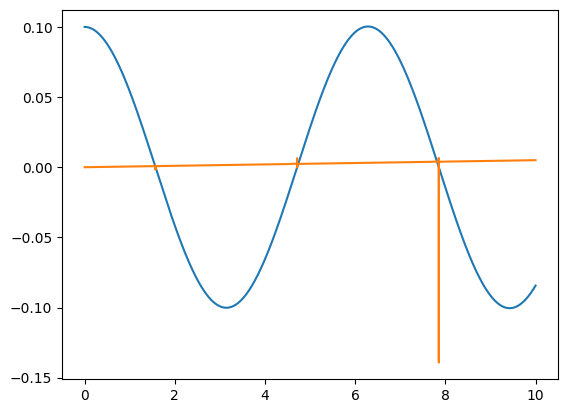

In [35]:

plt.plot(data[0],data[1])
rel_err=(data[1]-np.cos(data[0]))/np.cos(data[0])
plt.plot(data[0],data[3])